In [1]:
import sys
import importlib
import gc
import glob
import random
from itertools import combinations

import numpy as np
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import prettypyplot as pplt

import pyemma
import mdtraj as md

import ivac
import extq

sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting

In [2]:
pplt.load_cmaps()
plt.style.use("custom")  # custom style sheet
plt.style.use("muted")  # muted color theme from SciencePlots
colors = mpl.colors.to_rgba_array(
    [
        "#364B9A",
        "#4A7BB7",
        "#6EA6CD",
        "#98CAE1",
        "#C2E4EF",
        "#EAECCC",
        "#FEDA8B",
        "#FDB366",
        "#F67E4B",
        "#DD3D2D",
        "#A50026",
    ]
)
cm_div = mpl.colors.LinearSegmentedColormap.from_list("diverging", colors)
mpl.colormaps.register(cm_div, force=True)

In [3]:
from joblib import Parallel, delayed
from multiprocess import cpu_count
n_jobs = cpu_count()

In [4]:
import MDAnalysis as mda
from MDAnalysis.analysis.hydrogenbonds import HydrogenBondAnalysis

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


# Anton

In [5]:
topfile = "/project/dinner/scguo/ci-vsd/models/MD-clustering-center/civsd.psf"
u = mda.Universe(topfile, "/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.3.dcd")

In [6]:
r229_sel = "protein and resid 229 and not backbone and type NC2"
wat_sel = "name OH2 and around 3.0 (protein and resid 229)"
h_sel = "protein and resid 229 and type HC"
hbonds = HydrogenBondAnalysis(
    universe=u, 
    donors_sel=r229_sel, 
    hydrogens_sel=h_sel, 
    acceptors_sel=wat_sel,
    update_selections=True)

In [7]:
for a in u.select_atoms(r229_sel):
    print(a)

<Atom 2002: NE of type NC2 of resname ARG, resid 229 and segid A>
<Atom 2005: NH1 of type NC2 of resname ARG, resid 229 and segid A>
<Atom 2008: NH2 of type NC2 of resname ARG, resid 229 and segid A>


In [8]:
for a in u.select_atoms(wat_sel):
    print(a)

<Atom 26492: OH2 of type OT of resname TIP3, resid 1204 and segid W15>
<Atom 27578: OH2 of type OT of resname TIP3, resid 2910 and segid W15>
<Atom 41907: OH2 of type OT of resname TIP3, resid 1328 and segid WU2>
<Atom 46185: OH2 of type OT of resname TIP3, resid 778 and segid WD1>
<Atom 48165: OH2 of type OT of resname TIP3, resid 3488 and segid WD1>


In [9]:
for a in u.select_atoms(h_sel):
    print(a)

<Atom 2003: HE of type HC of resname ARG, resid 229 and segid A>
<Atom 2006: HH11 of type HC of resname ARG, resid 229 and segid A>
<Atom 2007: HH12 of type HC of resname ARG, resid 229 and segid A>
<Atom 2009: HH21 of type HC of resname ARG, resid 229 and segid A>
<Atom 2010: HH22 of type HC of resname ARG, resid 229 and segid A>


In [10]:
def hbond_anton(trajfile, r_i):
    u = mda.Universe(topfile, trajfile)
    r_sel = f"protein and resid {r_i} and not backbone and type NC2"
    wat_sel = f"name OH2 and around 3.0 (protein and resid {r_i})"
    h_sel = f"protein and resid {r_i} and type HC"
    hbonds = HydrogenBondAnalysis(
        universe=u, 
        donors_sel=r_sel, 
        hydrogens_sel=h_sel, 
        acceptors_sel=wat_sel,
        update_selections=True)
    return hbonds
        
def run_analysis(analysis):
    analysis.run()
    return analysis.count_by_time()

In [12]:
dcds = []
for i in range(3, 119):
    if i == 82:
        continue
    dcds.append(f"/beagle3/dinner/scguo/anton2-backup/dcdfiles/civsd.{i}.dcd")
print(len(dcds))

115


In [13]:
analysis_ensemble_217 = [hbond_anton(file, 217) for file in dcds]

In [14]:
results_217 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_217)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. 

(array([6.39500e+03, 1.10390e+04, 1.79920e+04, 2.70320e+04, 3.96710e+04,
        5.93220e+04, 8.35120e+04, 1.03375e+05, 1.14363e+05, 1.22476e+05,
        1.31697e+05, 1.26192e+05, 1.09798e+05, 8.35720e+04, 5.96310e+04,
        3.20650e+04, 1.47890e+04, 5.78700e+03, 1.21300e+03, 8.00000e+01]),
 array([9.00000e-04, 1.59250e-01, 3.17600e-01, 4.75950e-01, 6.34300e-01,
        7.92650e-01, 9.51000e-01, 1.10935e+00, 1.26770e+00, 1.42605e+00,
        1.58440e+00, 1.74275e+00, 1.90110e+00, 2.05945e+00, 2.21780e+00,
        2.37615e+00, 2.53450e+00, 2.69285e+00, 2.85120e+00, 3.00955e+00,
        3.16790e+00]),
 <BarContainer object of 20 artists>)

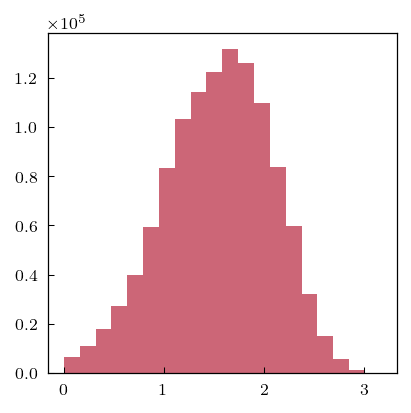

In [41]:
smoothed = util.smooth_moving_average(results_217, 100)
plt.hist(np.concatenate(smoothed), bins=20)

In [15]:
analysis_ensemble_223 = [hbond_anton(file, 223) for file in dcds]

In [16]:
results_223 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_223)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [17]:
analysis_ensemble_226 = [hbond_anton(file, 226) for file in dcds]

In [18]:
results_226 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_226)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [19]:
analysis_ensemble_229 = [hbond_anton(file, 229) for file in dcds]

In [20]:
results_229 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_229)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [21]:
analysis_ensemble_232 = [hbond_anton(file, 232) for file in dcds]

In [22]:
results_232 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_232)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [55]:
hb_wat = np.stack((results_217, results_223, results_226, results_229, results_232), axis=-1)

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/core/shape_base.py:420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arrays = [asanyarray(arr) for arr in arrays]


In [56]:
for t in results_217:
    print(len(t))

10001
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [53]:
hb_wat.shape

(115, 5)

In [54]:
np.save("../../data/raw_feat/hbond_wat_anton2.npy", hb_wat)

## start points

In [23]:
u = mda.Universe("/beagle3/dinner/scguo/anton2-backup/workdir.3/civsd.final.dms")

In [24]:
r_i = "112 118 121 124 127"
r_sel = f"protein and resid {r_i} and not backbone and name NE NH1 NH2"
wat_sel = f"name OH2 and around 3.0 (protein and resid {r_i})"
h_sel = f"protein and resid {r_i} and name HE HH11 HH21 HH22 HH12"

In [25]:
for i in u.select_atoms(r_sel):
    print(i)

<Atom 1780: NE of type N of resname ARG, resid 112 and segid SYSTEM>
<Atom 1783: NH1 of type N of resname ARG, resid 112 and segid SYSTEM>
<Atom 1786: NH2 of type N of resname ARG, resid 112 and segid SYSTEM>
<Atom 1884: NE of type N of resname ARG, resid 118 and segid SYSTEM>
<Atom 1887: NH1 of type N of resname ARG, resid 118 and segid SYSTEM>
<Atom 1890: NH2 of type N of resname ARG, resid 118 and segid SYSTEM>
<Atom 1946: NE of type N of resname ARG, resid 121 and segid SYSTEM>
<Atom 1949: NH1 of type N of resname ARG, resid 121 and segid SYSTEM>
<Atom 1952: NH2 of type N of resname ARG, resid 121 and segid SYSTEM>
<Atom 2002: NE of type N of resname ARG, resid 124 and segid SYSTEM>
<Atom 2005: NH1 of type N of resname ARG, resid 124 and segid SYSTEM>
<Atom 2008: NH2 of type N of resname ARG, resid 124 and segid SYSTEM>
<Atom 2055: NE of type N of resname ARG, resid 127 and segid SYSTEM>
<Atom 2058: NH1 of type N of resname ARG, resid 127 and segid SYSTEM>
<Atom 2061: NH2 of type N

In [77]:
for i in u.select_atoms(h_sel):
    print(i)

<Atom 1781: HE of type H of resname ARG, resid 112 and segid SYSTEM>
<Atom 1784: HH11 of type H of resname ARG, resid 112 and segid SYSTEM>
<Atom 1785: HH12 of type H of resname ARG, resid 112 and segid SYSTEM>
<Atom 1787: HH21 of type H of resname ARG, resid 112 and segid SYSTEM>
<Atom 1788: HH22 of type H of resname ARG, resid 112 and segid SYSTEM>
<Atom 1885: HE of type H of resname ARG, resid 118 and segid SYSTEM>
<Atom 1888: HH11 of type H of resname ARG, resid 118 and segid SYSTEM>
<Atom 1889: HH12 of type H of resname ARG, resid 118 and segid SYSTEM>
<Atom 1891: HH21 of type H of resname ARG, resid 118 and segid SYSTEM>
<Atom 1892: HH22 of type H of resname ARG, resid 118 and segid SYSTEM>
<Atom 1947: HE of type H of resname ARG, resid 121 and segid SYSTEM>
<Atom 1950: HH11 of type H of resname ARG, resid 121 and segid SYSTEM>
<Atom 1951: HH12 of type H of resname ARG, resid 121 and segid SYSTEM>
<Atom 1953: HH21 of type H of resname ARG, resid 121 and segid SYSTEM>
<Atom 1954: 

In [78]:
hbonds = HydrogenBondAnalysis(
    universe=u, 
    donors_sel=r_sel, 
    hydrogens_sel=h_sel, 
    acceptors_sel=wat_sel,
    update_selections=False)
hbonds.run()

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/base.py:892: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


In [82]:
hbonds.count_by_time()[0]

10

In [35]:
results_all = np.empty((115, 5, 10001))
i = 0
for i in range(3, 119):
    if i == 82:
        continue
    files = glob.glob(f"/beagle3/dinner/scguo/anton2-backup/workdir.{i}/*.dms")
    k = ""
    for f in files:
        if not "groups" in f:
            k = f
    for j, r_i in enumerate((112, 118, 121, 124, 127)):
        u = mda.Universe(k)
        r_sel = f"protein and resid {r_i} and not backbone and name NE NH1 NH2"
        wat_sel = f"name OH2 and around 3.0 (protein and resid {r_i})"
        h_sel = f"protein and resid {r_i} and name HE HH11 HH21 HH22 HH12"
        hbonds = HydrogenBondAnalysis(
            universe=u, 
            donors_sel=r_sel, 
            hydrogens_sel=h_sel, 
            acceptors_sel=wat_sel,
            update_selections=False)
        hbonds.run()
        
        results_all[i, j, 0] = hbonds.count_by_time()
    i += 1

/beagle3/dinner/scguo/anton2-backup/workdir.3/civsd.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.4/smd_13_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.5/smd_12_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.6/smd_13_end.final.2.dms
/beagle3/dinner/scguo/anton2-backup/workdir.7/smd_11_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.8/smd_28_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.9/smd_29_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.10/smd_30_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.11/smd_31_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.12/smd_32_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.13/smd_33_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.14/smd_34_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.15/smd_35_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.16/smd_36_end.final.dms
/beagle3/dinner/scguo/anton2-backup/workdir.17/smd_37_end.

In [50]:
for i in range(115):
    for j, result in enumerate((results_217, results_223, results_226, results_229, results_232)):
        results_all[i, j, 1:] = result[i][-10000:]

In [46]:
results_217[0][-10000:]

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
np.unravel_index(np.argmax(results_all), (115, 5, 10001))

(16, 2, 0)

In [72]:
results_ = np.where((results_all > 5) | (results_all < 0), 0, results_all)

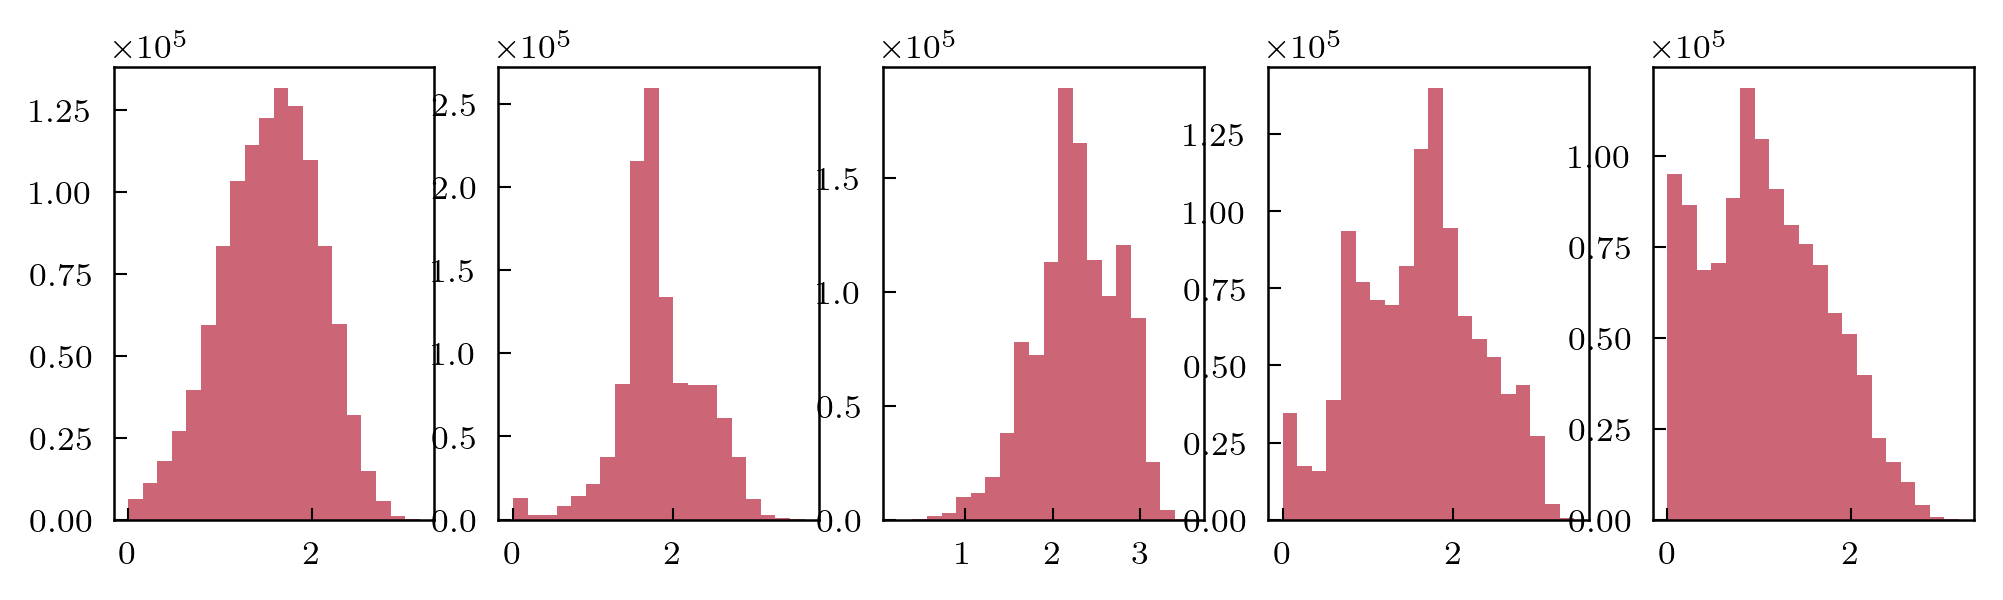

In [73]:
f, axs = plt.subplots(1, 5, figsize=(8,2), dpi=300)
for i, ax in enumerate(axs):
    smoothed = util.smooth_moving_average(list(results_[:, i, :]), 100)
    ax.hist(np.concatenate(smoothed), bins=20)

In [69]:
results_.shape

(115, 5, 10001)

In [76]:
results_ = [ans.T for ans in results_]

In [77]:
results_ = np.array(results_)

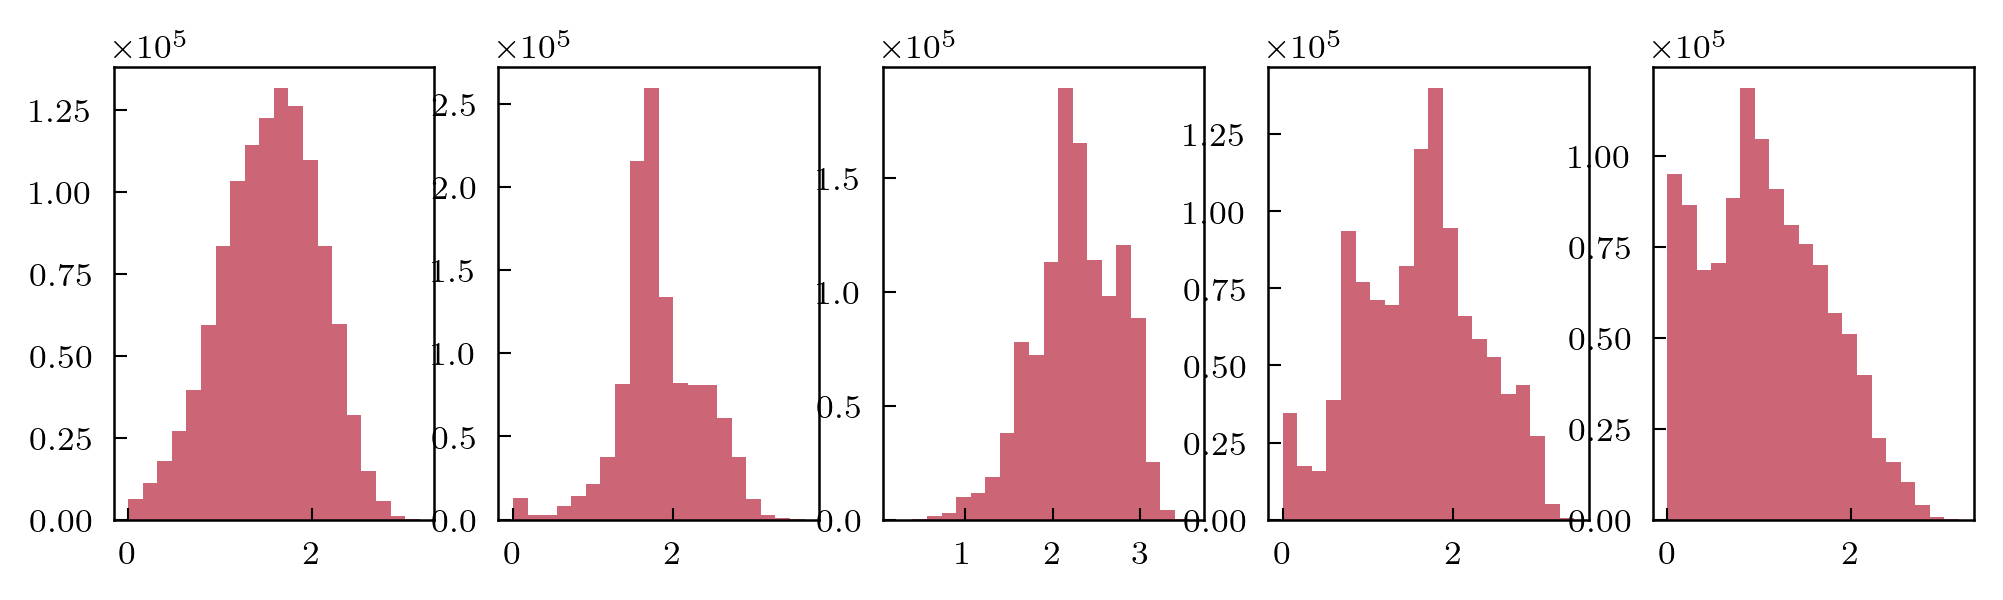

In [78]:
f, axs = plt.subplots(1, 5, figsize=(8,2), dpi=300)
for i, ax in enumerate(axs):
    smoothed = util.smooth_moving_average(list(results_[:, :, i]), 100)
    ax.hist(np.concatenate(smoothed), bins=20)

In [80]:
np.save("../../data/raw_feat/hbond_wat_anton2.npy", results_)

In [6]:
results_ = np.load("../../data/raw_feat/hbond_wat_anton2.npy")

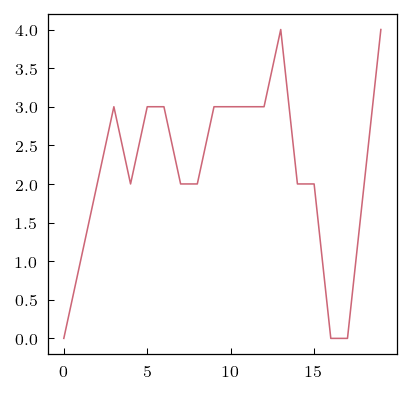

In [76]:
# plt.plot(util.smooth_moving_average(results_[19, :100, 2], 10))
plt.plot(results_[19, :20, 2])

In [7]:
# load committors and weights
import h5py

In [8]:
f = h5py.File("../../data/feat2_dist_du_anton2/feat2_dist_anton2.h5", mode="r")
q = f["y"][3_000_000:]
weights = f["weights"][3_000_000:]

In [9]:
q = np.split(q, 115)
weights = np.split(weights, 115)

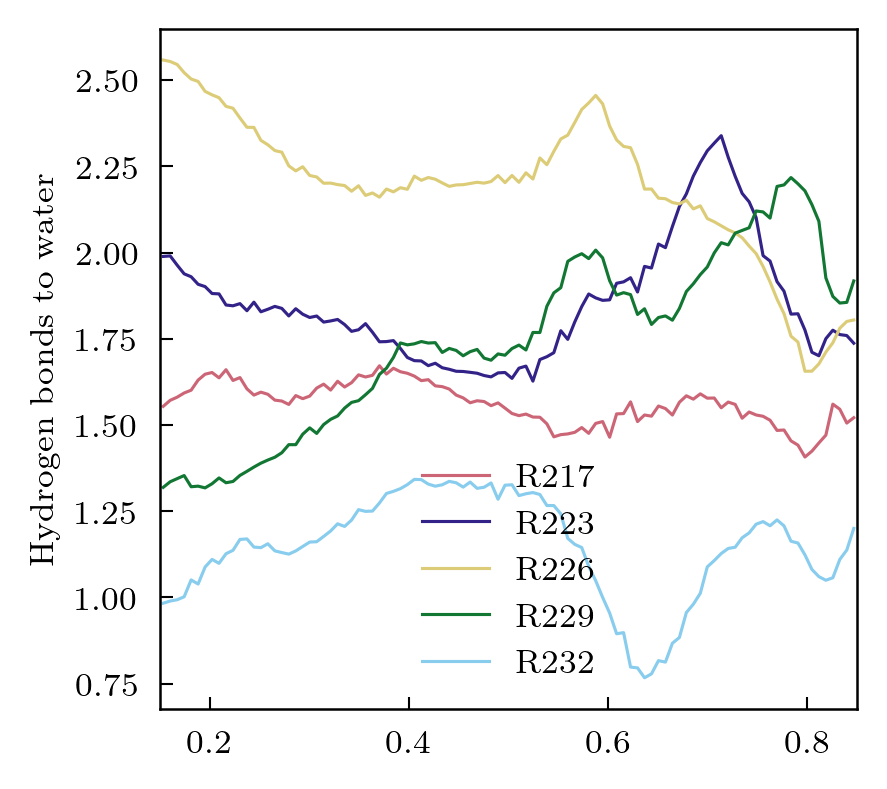

In [10]:
f, ax = plt.subplots(dpi=300)
lo, hi = 0.15, 0.85
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

for i in range(5):
    q_dens = extq.projection.average1d(q, results_[..., i], weights, qe)
    ax.plot(qc, q_dens)
plt.xlim([lo, hi])
plt.ylabel("Hydrogen bonds to water")
plt.legend(["R217", "R223", "R226", "R229", "R232"])

## Old Anton

In [89]:
dcds_old = []
for i in range(179):
    dcds_old.append(f"/project/dinner/scguo/anton-old/civsd_{i}.dcd")
print(len(dcds_old))

179


In [90]:
analysis_ensemble_217 = [hbond_anton(file, 217) for file in dcds_old]

In [91]:
old_217 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_217)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. 

In [92]:
analysis_ensemble_223 = [hbond_anton(file, 223) for file in dcds_old]

In [93]:
old_223 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_223)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:  2.8min
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:  2.9min
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [94]:
analysis_ensemble_226 = [hbond_anton(file, 226) for file in dcds_old]

In [95]:
old_226 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_226)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:  2.8min
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [96]:
analysis_ensemble_229 = [hbond_anton(file, 229) for file in dcds_old]

In [97]:
old_229 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_229)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:  2.1min
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:  2.8min
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:  3.0min
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:  3.0min
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:  3.0min
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [98]:
analysis_ensemble_232 = [hbond_anton(file, 232) for file in dcds_old]

In [99]:
old_232 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_232)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   2 tasks      | elapsed:  2.2min
[Parallel(n_jobs=48)]: Done   3 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done   4 tasks      | elapsed:  2.4min
[Parallel(n_jobs=48)]: Done   5 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   6 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   7 tasks      | elapsed:  2.5min
[Parallel(n_jobs=48)]: Done   8 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done   9 tasks      | elapsed:  2.6min
[Parallel(n_jobs=48)]: Done  10 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  11 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  12 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  13 tasks      | elapsed:  2.7min
[Parallel(n_jobs=48)]: Done  14 tasks      | elapsed:  2.8min
[Parallel(n_jobs=48)]: Done  15 tasks      | elapsed:  

In [100]:
old_217 = [t[:10000] for t in old_217]
old_223 = [t[:10000] for t in old_223]
old_226 = [t[:10000] for t in old_226]
old_229 = [t[:10000] for t in old_229]
old_232 = [t[:10000] for t in old_232]
hb_old = np.stack((old_217, old_223, old_226, old_229, old_232), axis=-1)

In [101]:
hb_old.shape

(179, 10000, 5)

In [102]:
np.save("../../data/raw_feat/hbond_wat_0-178.npy", hb_old)

In [20]:
hb_old = np.load("../../data/raw_feat/hbond_wat_0-178.npy")

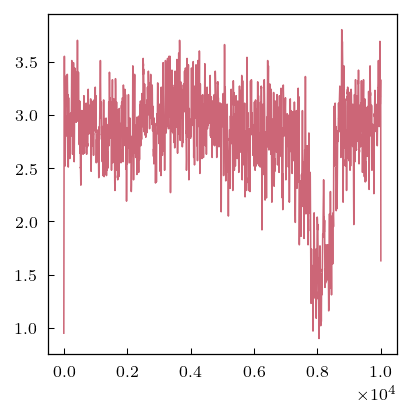

In [48]:
plt.plot(util.smooth_moving_average(hb_old[2, :, 2], 10))
# plt.plot(hb_old[1, :100, 2])

In [78]:
f = h5py.File("../../data/feat2_dist_du_anton2/feat2_dist_anton2.h5", mode="r")
q = f["y"][:1_790_000]
weights = f["weights"][:1790000]

In [79]:
q = np.split(q, 179)
weights = np.split(weights, 179)

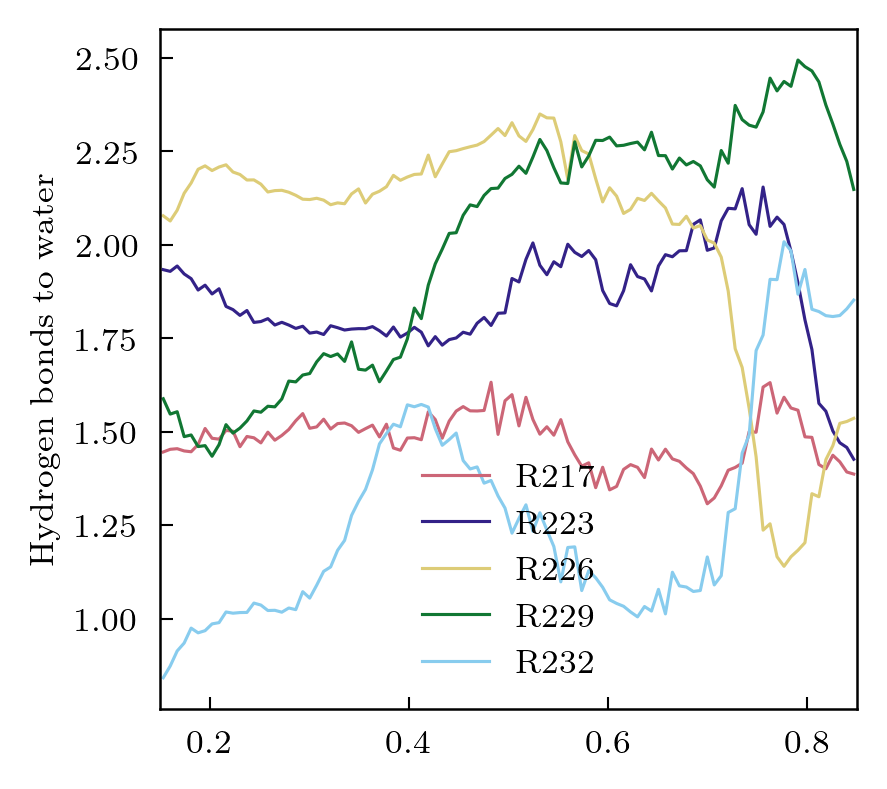

In [80]:
f, ax = plt.subplots(dpi=300)
lo, hi = 0.15, 0.85
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

for i in range(5):
    q_dens = extq.projection.average1d(q, hb_old[..., i], weights, qe)
    ax.plot(qc, q_dens)
plt.xlim([lo, hi])
plt.ylabel("Hydrogen bonds to water")
plt.legend(["R217", "R223", "R226", "R229", "R232"])

## Second half of antont trajectories

In [11]:

remove = {1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
}
files = []
for i in range(179, 295):
    if i == 180:
        continue
    if (i + 1000) not in remove:
        files.append(f"/project/dinner/scguo/anton-old/civsd_{i}.dcd")

In [12]:
analysis_ensemble_217 = [hbond_anton(file, 217) for file in files]
analysis_ensemble_223 = [hbond_anton(file, 223) for file in files]
analysis_ensemble_226 = [hbond_anton(file, 226) for file in files]
analysis_ensemble_229 = [hbond_anton(file, 229) for file in files]
analysis_ensemble_232 = [hbond_anton(file, 232) for file in files]

In [ ]:
results_217 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_217)

[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")
/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/MDAnalysis/coordinates/chemfiles.py:108: DeprecationWarning: distutils Version classes are deprecated. 

In [ ]:
results_223 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_223)

In [ ]:
results_226 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_226)

In [ ]:
results_229 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_229)

In [ ]:
results_232 = Parallel(n_jobs=n_jobs, verbose=20)(
    delayed(run_analysis)(analysis) for analysis in analysis_ensemble_232)

In [53]:
hb_new = [np.stack((r217, r223, r226, r229, r232), axis=-1) for (r217, r223, r226, r229, r232) in zip(
    results_217, results_223, results_226, results_229, results_232)]

In [54]:
hb_new_short = []
for hb in hb_new:
    length = len(hb)
    if length > 10000 and length < 100000:
        length = 10000
    hb_new_short.append(hb[:length])

In [55]:
for t in hb_new_short:
    print(len(t))

100000
100000
100000
100000
100000
100000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000
10000


In [56]:
np.save("../../data/raw_feat/hbond_wat_179-end.npy", hb_new_short)

/project/dinner/scguo/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [23]:
# load committors and weights
import h5py

In [24]:
f = h5py.File("../../data/feat2_dist_du_anton2/feat2_dist_anton2.h5", mode="r")
q = f["y"]
weights = f["weights"]

In [64]:
hb_water = list(np.load("../../data/raw_feat/hbond_wat_0-178.npy"))
# hb_water.extend(np.load("../../data/raw_feat/hbond_phos_179-end.npy", allow_pickle=True))
hb_water.extend(hb_new_short)
hb_water.extend(np.load("../../data/raw_feat/hbond_wat_anton2.npy"))
print(len(hb_water))

351


In [30]:
DATA_DIR = "/project/dinner/scguo/ci-vsd/data"
# S4 translocation/rotation data
cv_trajs = list(
    np.load(f"{DATA_DIR}/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
)
cv_trajs.extend(np.load(f"{DATA_DIR}/raw_feat/cv_dist_spin_anton2.npy"))
cv_arr = np.concatenate(cv_trajs)
# salt bridge distances for states
sb_trajs = list(np.load(f"{DATA_DIR}/raw_feat/feat2_raw_anton.npy", allow_pickle=True))
sb_trajs.extend(np.load(f"{DATA_DIR}/raw_feat/feat2_raw_anton2.npy"))
sb_arr = np.concatenate(sb_trajs)
# committors
lag = 500

In [31]:
# states to do stopping
dist = cv_arr[:, 0]
rot = cv_arr[:, 1]
sb1 = sb_arr[:, 42]  # R226-D129
sb2 = sb_arr[:, 47]  # R226-D186
sb3 = sb_arr[:, 48]  # R229-D129
sb4 = sb_arr[:, 53]  # R229-D186
sb5 = sb_arr[:, 59]  # R232-D186

# ellipse centered at down centroid with radii 1.1 nm and 8 deg (1 sigma in each direction)
# take points where R2-D186 < 0.5 (lower salt bridges), R2-D129 > 0.6 (upper salt bridge)
dist_ax_down = (dist + 4.240) / 1.1
rot_ax_down = (rot + 56.95) / 8
down_ids = ((dist_ax_down ** 2 + rot_ax_down ** 2) < 1) & (sb1 > 0.6) & (sb2 < 0.5)

# ellipse centered at up centroid with radii 0.84 nm and 7.6 deg (2 sigma in each direction)
# take points where R2-D129 (up) < 0.5, R3-D129 < 1.1, R3/R4-D186 salt bridges < 0.75/0.6 nm
up_ids = (
    ((((dist + 0.506) / 0.84) ** 2 + ((rot - 3.94) / 7.6) ** 2) < 1)
    & (sb1 < 0.5)
    & (sb3 < 1.1)
    & (sb4 < 0.75)
    & (sb5 < 0.6)
)

In [32]:
mask = ~(down_ids | up_ids)
traj_inds = util.split_indices(cv_trajs)
in_domain = np.split(mask, traj_inds)

In [29]:
from extq.stop import forward_stop

In [37]:
q = np.split(q, traj_inds)
weights = np.split(weights, traj_inds)

In [38]:
qp_delay, w_delay = [], []
for i, (qt, wt, d) in enumerate(zip(q, weights, in_domain)):
    if i == 180:
        continue
    w_delay.append(wt[:-lag])
    stop_times = np.minimum(np.arange(lag, len(d)), forward_stop(d)[:-lag])
    qp_delay.append(qt[stop_times])

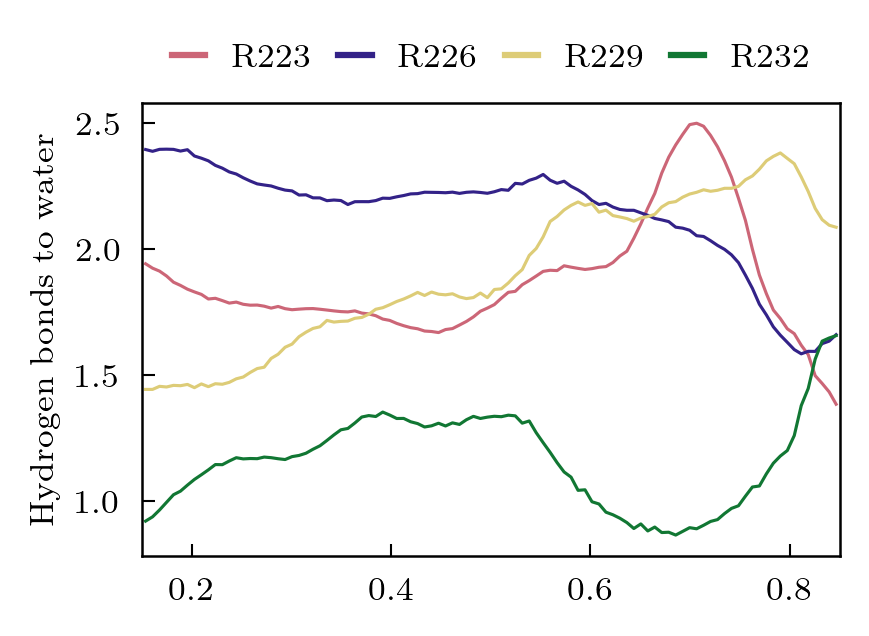

In [66]:
f, ax = plt.subplots(figsize=(3., 2), dpi=300)
lo, hi = 0.15, 0.85
qe = np.linspace(lo, hi, 101)
qc = (qe[1:] + qe[:-1]) / 2

labels = ["R217", "R223", "R226", "R229", "R232"]
for i in range(1, 5):
    hb_traj = util.smooth_moving_average([t[:-lag, i] for t in hb_water], 10, n=1)
    q_dens = extq.projection.average1d(qp_delay, hb_traj, w_delay, qe)
    ax.plot(qc, q_dens, label=labels[i])
    
plt.xlim([lo, hi])
# plt.ylim([0, 2.0])
plt.ylabel("Hydrogen bonds to water")
leg = pplt.legend(
    outside='top', 
    ncol=4,
    columnspacing=1, 
    handlelength=1, 
    facecolor='white', 
    fontsize=8)
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)

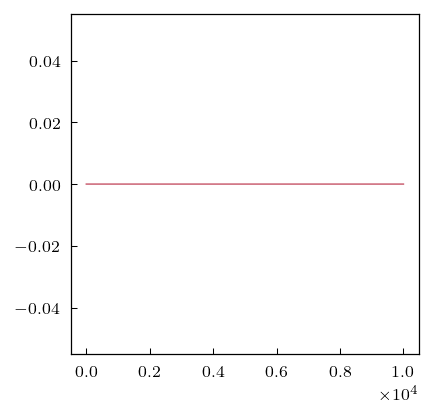

In [47]:
plt.plot(hb_water[180][:10000, 2])

In [49]:
analysis = hbond_anton(files[1], 226)

In [50]:
hb_test = run_analysis(analysis)

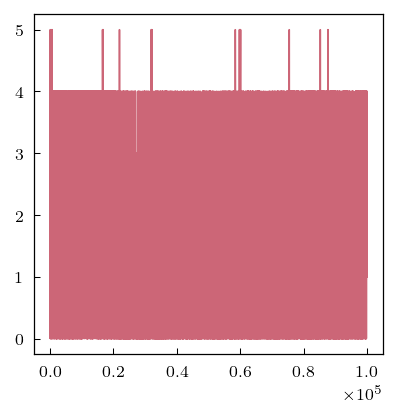

In [51]:
plt.plot(hb_test)

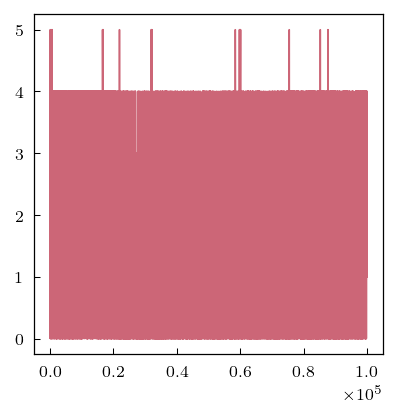

In [52]:
plt.plot(results_226[1])

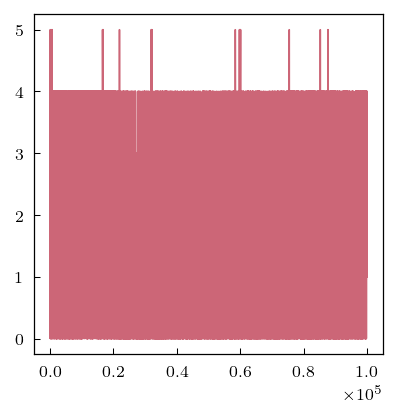

In [63]:
plt.plot(hb_new_short[1][:, 2])